In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('Week5_Project_foodhub_order.csv')

In [3]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31


In [5]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns present in the data")

There are 1898 rows and 9 columns present in the data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are 5 numerical columns and 4 object type columns in the data

In [10]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* No missing values present in the given dataset

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
* The minimum time it takes for food to be prepared once an order is placed is 20 minutes
* The average time it takes for food to be prepared once an order is placed is around 27 minutes
* The maximum time it takes for food to be prepared once an order is placed is 35 minutes

In [13]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* From the given data set, 736 orders were not rated in the ratings column

In [15]:
df['order_id'].nunique()

1898

####  Observations: 
* Each individual order_id is a unique number

In [17]:
df['customer_id'].duplicated().sum()

698

#### Observations:
* Number of repeating customers is equal to 698

In [18]:
df.restaurant_name.nunique()

178

#### Observations: 
* There are 178 unique restaurants in the dataset occuring in 1898 transactions

### Univariate Analysis

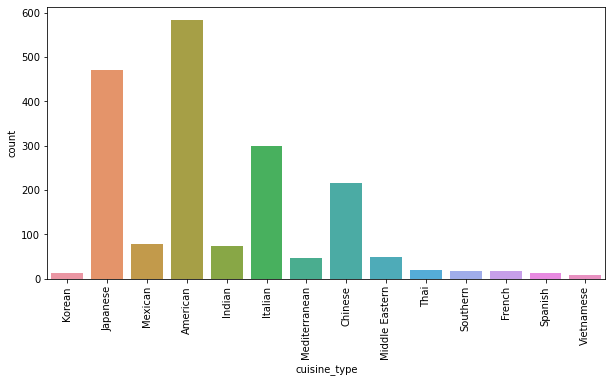

In [20]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'cuisine_type');

In [21]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

#### Observations:
* American cuisines have the highest count in the cuisine_type column 
* The lowest count for is for Vietnamese cuisine 

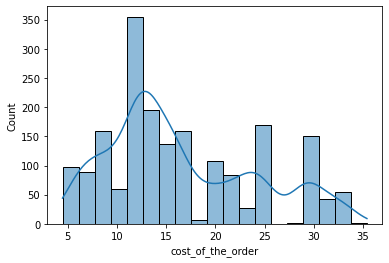

In [22]:
sns.histplot(data=df, x= 'cost_of_the_order', kde = True);

In [24]:
df['cost_of_the_order'].describe()

count   1898.000
mean      16.499
std        7.484
min        4.470
25%       12.080
50%       14.140
75%       22.297
max       35.410
Name: cost_of_the_order, dtype: float64

In [25]:
df['cost_of_the_order'].value_counts()

12.180    86
12.130    82
12.230    47
24.200    42
29.100    37
          ..
5.480      1
17.070     1
6.260      1
9.610      1
29.590     1
Name: cost_of_the_order, Length: 312, dtype: int64

#### Observations:
* Cost of order ranges between 4 Dollars and 36 Dollars and has the highest density around $12

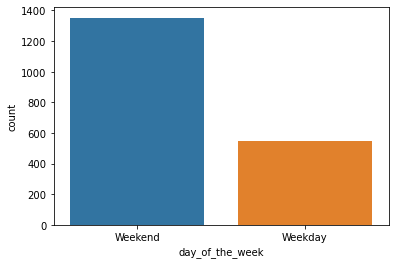

In [29]:
sns.countplot(data=df, x='day_of_the_week');

In [30]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

#### Observations: 
* It is seen that orders placed in the weekends are more than twice as much as those during weekdays

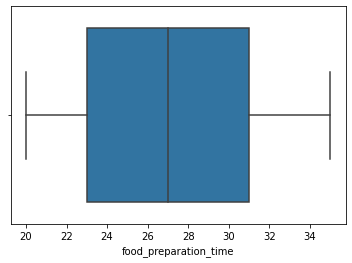

In [31]:
sns.boxplot(data=df, x='food_preparation_time');

In [32]:
df['food_preparation_time'].describe()

count   1898.000
mean      27.372
std        4.632
min       20.000
25%       23.000
50%       27.000
75%       31.000
max       35.000
Name: food_preparation_time, dtype: float64

#### Observations: 
* It is seen that the average time taken to prepare the food is around 26 minutes
* The boxplot indicates minimum time taken is 20 minutes and maximum time taken is 35 minutes

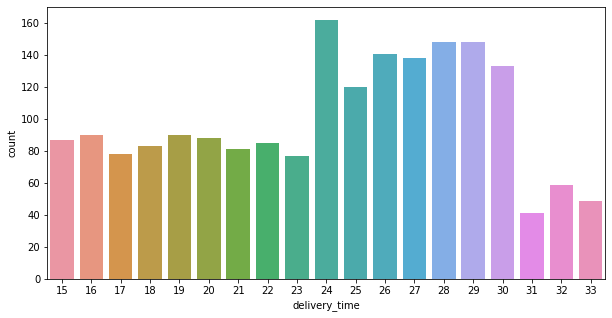

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(data=df, x='delivery_time');

In [34]:
df['delivery_time'].value_counts(ascending=True)

31     41
33     49
32     59
23     77
17     78
21     81
18     83
22     85
15     87
20     88
19     90
16     90
25    120
30    133
27    138
26    141
29    148
28    148
24    162
Name: delivery_time, dtype: int64

In [35]:
df['delivery_time'].describe()

count   1898.000
mean      24.162
std        4.973
min       15.000
25%       20.000
50%       25.000
75%       28.000
max       33.000
Name: delivery_time, dtype: float64

#### Observations:
* Minimum delivery time: 15 mins
* Maximum delivery time: 33 mins
* Most occured delivery time: 24 mins

In [36]:
df.groupby(['restaurant_name']).size().sort_values(ascending = False).head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

#### Observations: 
* The top 5 restaurants in terms of number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Bule Ribbon Fried Chicken and Parm

In [38]:
most_popular_cuisine_weekends=df[df['day_of_the_week']=='Weekend'].groupby(['cuisine_type'])
most_popular_cuisine_weekends.size().sort_values(ascending = False).head(1)

cuisine_type
American    415
dtype: int64

#### Observations:
* American cuisine is the most popular cuisine on weekends

In [41]:
percentage_of_orders = len(df[df['cost_of_the_order'] > 20])/len(df)*100
print("The percentage of orders cost more than 20 dollars is",round(percentage_of_orders,2),"%")

The percentage of orders cost more than 20 dollars is 29.24 %


#### Observations:
* 29.24% of orders cost more than 20 Dollars

In [42]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* The mean (average) order delivery time is 24.16 minutes

In [43]:
df['customer_id'].value_counts().sort_values(ascending=False).head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
* The columns above represent top 5 customer id with the most number of orders placed that should receive the 20% discount vouchers

### Multivariate Analysis

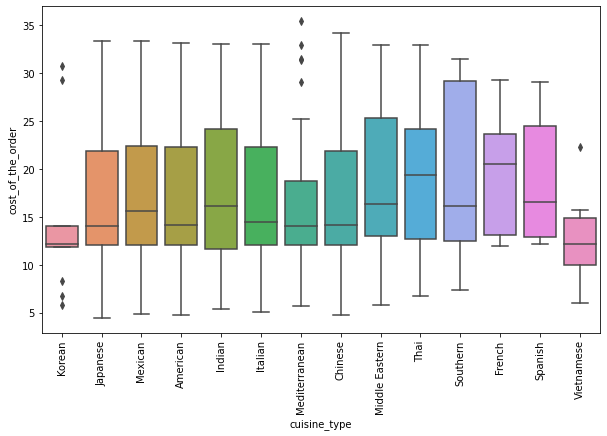

In [44]:
plt.figure(figsize =(10,6));
plt.xticks(rotation=90)
sns.boxplot(data=df,x='cuisine_type', y='cost_of_the_order');

#### Observations:
* It is seen that the cuisine type Mediterranean has one of the highest cost of orders in the dataset with one of the lowest seen in Japanese

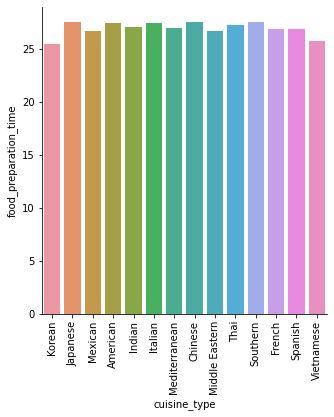

In [78]:
sns.catplot(data=df, y='food_preparation_time', x='cuisine_type', kind='bar', ci=False);
plt.xticks(rotation=90);

#### Observations:
* The graph above shows that Korean and Vietnamese cuisine types are among the ones with least food_preparation time taken 

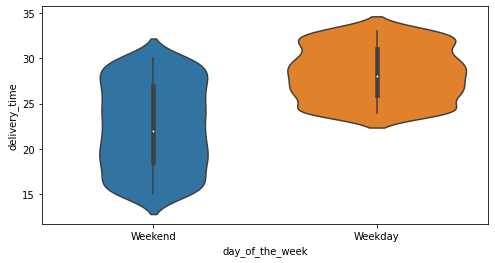

In [79]:
plt.figure(figsize =(8,4));
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time');

#### Observations:
* The graph above shows that compared to the weekends, it takes a bit more time for the food to be delivered in the weekdays

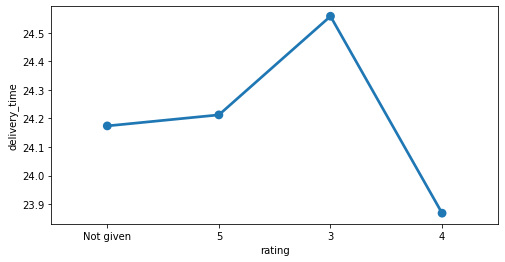

In [80]:
plt.figure(figsize =(8,4));
sns.pointplot(data=df, x='rating', y='delivery_time', ci=False);

#### Observations:
* Delivery time for restaurants with a rating of 3 is the highest while that of rating 4 is the lowest

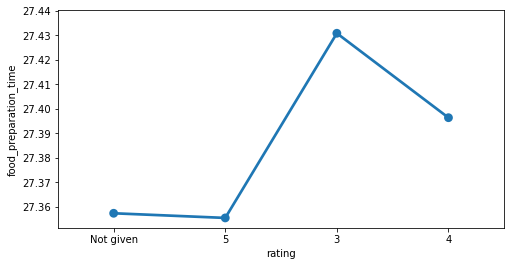

In [85]:
plt.figure(figsize =(8,4));
sns.pointplot(data=df, x='rating', y='food_preparation_time',kind='point',ci=False);

#### Observations:
* Restaurants with rating of 5 take the least time to prepare food while those with a rating of 3 take the most time

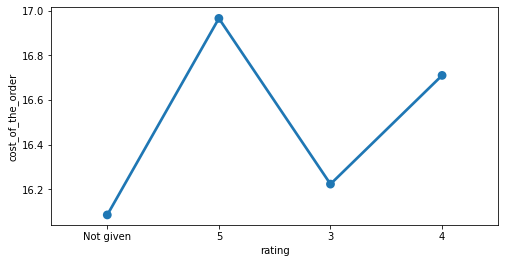

In [88]:
plt.figure(figsize=(8,4));
sns.pointplot(data=df, x='rating',y='cost_of_the_order',ci=False);

#### Observations:
* Cost of order for restaurants with a rating of 5 is the highest while that of restaurants with a rating of 3 is one of the lowest

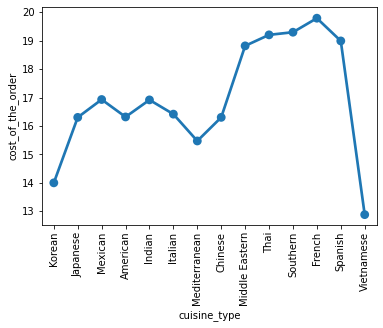

In [91]:
plt.xticks(rotation=90);
sns.pointplot(data=df, x='cuisine_type', y='cost_of_the_order',kind='point',ci=False,);

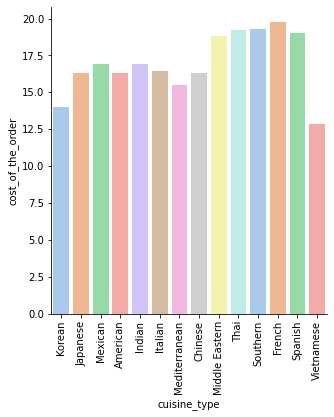

In [92]:
sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order',kind='bar',ci=False, palette='pastel');
plt.xticks(rotation=90);

#### Observations:
* Both the graphs above show that French cuisine type has one of the highest cost of orders whereas that of Vietnamese cuisine type is one of the lowest

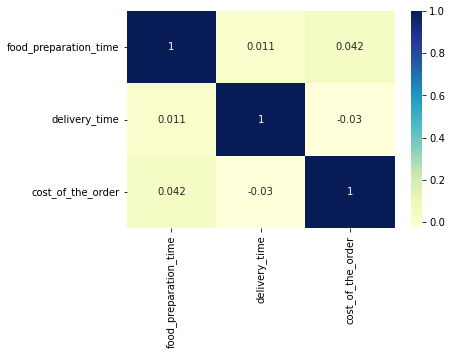

In [63]:
sns.heatmap(data=df [['food_preparation_time','delivery_time','cost_of_the_order',]].corr(),annot=True, cmap='YlGnBu');

#### Observations:
* It is seen that cost of order, food preparation time and delivery time are not strongly correlated to be analyzed further

In [93]:
count50 = df.groupby("restaurant_name").filter(lambda x:len(x)>50)[['restaurant_name','rating']]
count50 = count50[count50['rating']!='Not given'].astype({'rating':'float'})
rate50 = count50.groupby("restaurant_name")['rating'].mean()
rate50[rate50>4]

restaurant_name
Blue Ribbon Fried Chicken   4.328
Blue Ribbon Sushi           4.219
Parm                        4.128
RedFarm Broadway            4.244
RedFarm Hudson              4.176
Shake Shack                 4.278
The Meatball Shop           4.512
Name: rating, dtype: float64

#### Observations:
* Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Parm, RedFarm Broadway, RedFarm Hudson, Shake Shack andThe Meatball Shop are the restaurants that fulfill the promotional offer criteria of having a rating count of more than 50 with an average rating greater than 4

In [94]:
cost1=df[df['cost_of_the_order']>20]['cost_of_the_order']
cost2=df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]['cost_of_the_order']
net=cost1.sum()*0.25 +cost2.sum()*0.15
print("The net revenue of company is $", net)

The net revenue of company is $ 6166.303


#### Observations:
* The net revenue generated by the company across all orders that charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars is $6166.30

In [95]:
df['total_time'] = df['food_preparation_time']+df['delivery_time']
orders_more_than_60 = len(df[df['total_time']>60])/len(df)*100
print("The percentage of orders take more than 60 minutes is",round(orders_more_than_60,2),"%")

The percentage of orders take more than 60 minutes is 10.54 %


#### Observations:
* Around 10.54% of food orders take more than 60 minutes to get delivered from the time the order is placed (from preparation to delivery of the food)

In [96]:
Weekdaymeantime = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
Weekendmeantime = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
varytime = Weekdaymeantime-Weekendmeantime
print("The mean delivery time vary during weekdays and weekends is",round(varytime,2),"seconds.")

The mean delivery time vary during weekdays and weekends is 5.87 seconds.


#### Observations:
* The results of our analysis show that the mean delivery time vary during weekdays and weekends is around 5.87 seconds

### Conclusions:
* The top 5 restaurants by number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Bule Ribbon Fried Chicken, and Parm with their favorite weekend American dishes. 
* The percentage of orders that cost over $20 was 29.24%, and the highest number of orders received by most frequent customers was 13. 
* The Meatball Store had the highest rating of 4.512. 
* The net revenue of the business is 6,166.30 dollars.
* The average delivery time for orders is 24.16 minutes, and the average delivery time for weekdays and weekends is 5.87 minutes. The rate of orders lasting more than 60 minutes is 10.54%.


### Recommendations:
*  They can give special offers to the top 5 restaurants with the highest number of orders. Also, They can enourage restaurants to make special discount offers on American Cuisine on the weekends.
* The most number of orders are below 20 dollars. So they can apply some discounnt over 20 dollar orders to increase the number of orders. Also They can give loyalty cards to customers over 10 orders to get their loyalty.
* They can give special offers to the most highly rated restaurants.
* They can bring more segmentation for higher orders to increase the revenue.
* They can take less share on the orders deliver before 60 minutes to make sure the orders delivered timely to get more customers satisied. 